In [1]:
import pandas as pd
import sklearn
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from statistics import median
from scipy.spatial import distance

def get_distance_from_centroid(datum, kmeans):
    cluster = kmeans.predict([datum])
    centroid = kmeans.cluster_centers_[cluster]
    dist = distance.euclidean(centroid[0], datum) 
    return dist

def get_median_distance_from_centroids(data_points, kmeans):
    distances = []
    for d in data_points:
        distances.append(get_distance_from_centroid(d, kmeans))
    return median(distances)

def get_anomalies(data_points, kmeans, threshold=2):
    median_dist = get_median_distance_from_centroids(data_points, kmeans)
    anomalies = []
    for k,d in enumerate(data_points):
        dist = get_distance_from_centroid(d, kmeans)
        if dist > median_dist*threshold:
            anomalies.append(k)
    return anomalies

In [2]:
df = pd.read_csv("outputs/resultsclusteredconstituencieslocations.csv")

In [3]:
# df = pd.concat([ewdf,scotdf],ignore_index=True)
# df = df.drop([0,1,577,578]).copy()



drop_cols = ["Unnamed: 0", "ONS code", "New constituency name", "Unnamed: 5", 'Unnamed: 12', 'Unnamed: 20', 'Unnamed: 27','Unnamed: 37']
drop_cols = [ "ONS code", "Total population", "New constituency name",'Cluster', '2019_Results', '2017_Results', '2015_Results',
       '2010_Results', '2005_Results', 'Low_Confidence_Imputation', '2019_Resultscon', '2019_Resultslab',
       '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat',
       '2019_Resultsoth', '2019_Resultstot', 
       #'2019_Resultscon_pc',
       #'2019_Resultslab_pc', '2019_Resultslib_pc', '2019_Resultsref_pc',
       #'2019_Resultsnat_pc', '2019_Resultsoth_pc', 
       '2017_Resultscon',
       '2017_Resultslab', '2017_Resultslib', '2017_Resultsref',
       '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot',
       #'2017_Resultscon_pc', '2017_Resultslab_pc', '2017_Resultslib_pc',
       #'2017_Resultsref_pc', '2017_Resultsnat_pc', '2017_Resultsoth_pc',
       '2015_Resultscon', '2015_Resultslab', '2015_Resultslib',
       '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth',
       '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc',
       '2015_Resultslib_pc', '2015_Resultsref_pc', '2015_Resultsnat_pc',
       '2015_Resultsoth_pc', '2010_Resultscon', '2010_Resultslab',
       '2010_Resultslib', '2010_Resultsref', '2010_Resultsnat',
       '2010_Resultsoth', '2010_Resultstot', '2010_Resultscon_pc',
       '2010_Resultslab_pc', '2010_Resultslib_pc', '2010_Resultsref_pc',
       '2010_Resultsnat_pc', '2010_Resultsoth_pc', '2005_Resultscon',
       '2005_Resultslab', '2005_Resultslib', '2005_Resultsref',
       '2005_Resultsnat', '2005_Resultsoth', '2005_Resultstot',
       '2005_Resultscon_pc', '2005_Resultslab_pc', '2005_Resultslib_pc',
       '2005_Resultsref_pc', '2005_Resultsnat_pc', '2005_Resultsoth_pc',
       'EngReg', 'Scot', 'Region', 'Cluster Des',
       #"Longitude"
       ]


unnamed_cols = [col for col in df.columns if "Unnamed:" in col]
for col in unnamed_cols:
    drop_cols.append(col)
print(list(drop_cols))
xdf = df.drop(drop_cols,axis=1)
xdf = xdf.dropna(axis=1).copy()
print(xdf.columns)
# xdf.fillna(xdf.mean(), inplace=True)
X = xdf.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)




km = KMeans(random_state=2031, n_clusters=10)
km.fit(X)



anomalies = get_anomalies(X, km, threshold=1.75)
cluster_labels = km.labels_
cluster_labels[anomalies] = 999
df["Cluster"] = cluster_labels
df["Cluster"].value_counts()

['ONS code', 'Total population', 'New constituency name', 'Cluster', '2019_Results', '2017_Results', '2015_Results', '2010_Results', '2005_Results', 'Low_Confidence_Imputation', '2019_Resultscon', '2019_Resultslab', '2019_Resultslib', '2019_Resultsref', '2019_Resultsnat', '2019_Resultsoth', '2019_Resultstot', '2017_Resultscon', '2017_Resultslab', '2017_Resultslib', '2017_Resultsref', '2017_Resultsnat', '2017_Resultsoth', '2017_Resultstot', '2015_Resultscon', '2015_Resultslab', '2015_Resultslib', '2015_Resultsref', '2015_Resultsnat', '2015_Resultsoth', '2015_Resultstot', '2015_Resultscon_pc', '2015_Resultslab_pc', '2015_Resultslib_pc', '2015_Resultsref_pc', '2015_Resultsnat_pc', '2015_Resultsoth_pc', '2010_Resultscon', '2010_Resultslab', '2010_Resultslib', '2010_Resultsref', '2010_Resultsnat', '2010_Resultsoth', '2010_Resultstot', '2010_Resultscon_pc', '2010_Resultslab_pc', '2010_Resultslib_pc', '2010_Resultsref_pc', '2010_Resultsnat_pc', '2010_Resultsoth_pc', '2005_Resultscon', '2005_R

Cluster
6      95
4      87
1      74
999    66
0      62
3      62
9      45
2      41
7      40
5      32
8      28
Name: count, dtype: int64

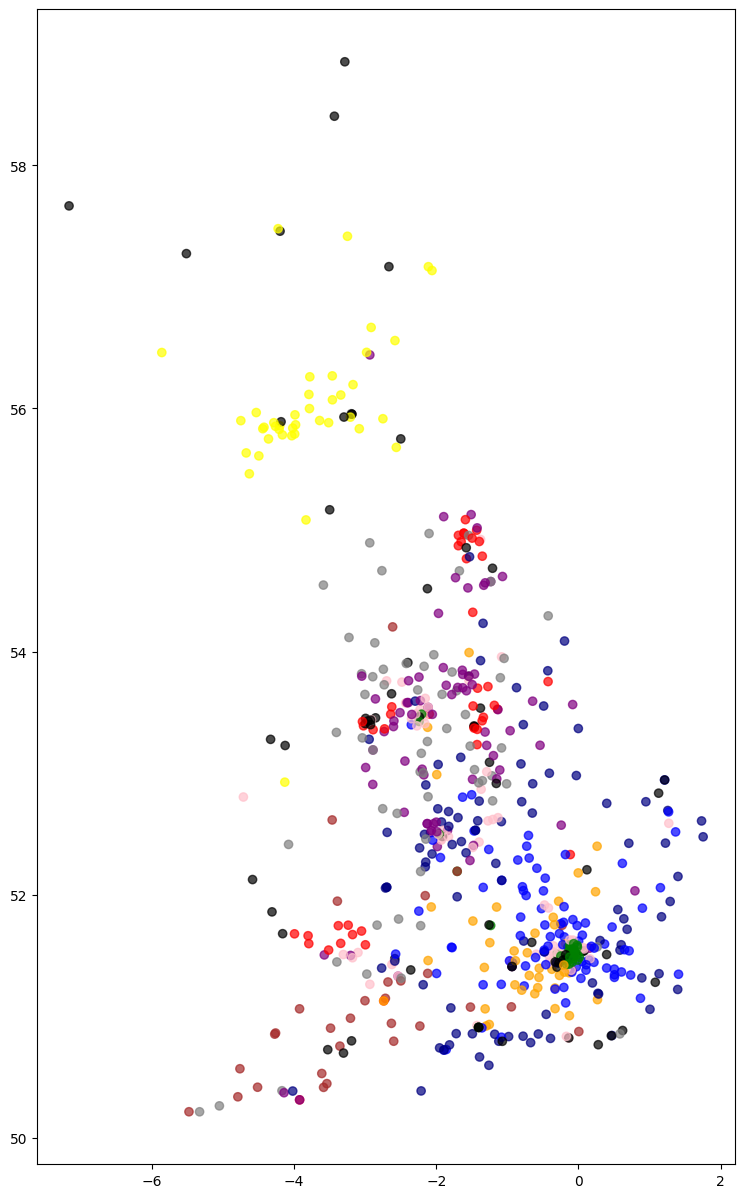

In [29]:
colours = ["grey", "purple", "yellow", "pink", "blue", "brown", "navy", "black", "green", "red", "orange"]
cluster_colours ={}
for k,c  in enumerate(list(set(list(df["Cluster"])))):
    cluster_colours[c] = colours[k]
ax = plt.figure()
ax.set_size_inches(9,15)
plt.scatter(df["Longitude"], df["Latitude"], c=[cluster_colours[c] for c in df["Cluster"]], alpha=0.7)

In [30]:
from UKGE import get_descriptive_cluster_labels_17
cluster_des_dict = get_descriptive_cluster_labels_17()
for c, col in cluster_colours.items():
    print(c,cluster_des_dict[c], col, df["Cluster"].value_counts()[c])

0 Old NW England grey 62
1 Brexit Lab-Con Marginals purple 74
2 SNP yellow 41
3 Labour Families pink 62
4 Working Families blue 87
5 Old Lib-Con SW brown 32
6 Old Conservative navy 95
999 Anomalous black 66
8 Remain Working London green 28
9 Labour Brexit red 45
7 Working Remain Lib-Cons SE orange 40


In [6]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
df.loc[closest].loc[:,["Cluster",'New constituency name']]

,Cluster,New constituency name
437,0,Shrewsbury
216,1,Halifax
611,2,Hamilton and Clyde Valley
282,3,Leicester West
369,4,Northampton South
200,5,Glastonbury and Somerton
422,6,Rutland and Stamford
558,7,Witney
381,8,Oxford East
473,9,St Helens North


In [16]:
df.loc[[216,473]]
for col in list(df.columns):
    print(df.loc[[216,473]][col])

216    216
473    473
Name: Unnamed: 0, dtype: int64
216    E14001262
473    E14001509
Name: ONS code, dtype: object
216            Halifax
473    St Helens North
Name: New constituency name, dtype: object
216    107584
473    100169
Name: Total population, dtype: int64
216    0.209185
473    0.180844
Name: Aged 15 years and under, dtype: float64
216    0.099569
473    0.087881
Name: Aged 16 to 24 years, dtype: float64
216    0.132659
473    0.129581
Name: Aged 25 to 34 years, dtype: float64
216    0.192742
473    0.185746
Name: Aged 35 to 49 years, dtype: float64
216    0.194146
473    0.207549
Name: Aged 50 to 64 years, dtype: float64
216    0.171698
473    0.208398
Name: Aged 65 years and over, dtype: float64
216    1
473    9
Name: Cluster, dtype: int32
216    {'con': 19958, 'lab': 22328, 'lib': 2375, 'ref...
473    {'con': 12661, 'lab': 24870, 'lib': 2668, 'ref...
Name: 2019_Results, dtype: object
216    {'con': 21052, 'lab': 26407, 'lib': 1137, 'ref...
473    {'con': 13606, 'lab'

In [7]:
df.loc[198]

Unnamed: 0                           198
ONS code                       E14001245
New constituency name            Gedling
Total population                  101081
Aged 15 years and under          0.17857
                               ...      
Scot                               False
Region                     East Midlands
Cluster Des                     Marginal
Latitude                       53.026054
Longitude                      -1.107117
Name: 198, Length: 89, dtype: object

In [8]:
df["Aged 65 years and over"].std()

0.052937860162360365

In [11]:
clusters = list(set(list(df["Cluster"])))
print("AGE: ",df["Aged 65 years and over"].mean())
print("Ref: ",df["Ref16_Results"].mean())
print("Lab: ",df["Latitude"].mean())
for c in clusters:
    rdf = df[df["Cluster"]==c]
    print("Cluster: ",c,"_________________________")
    # if c == 0:
    #     print("Young Labour Cities")
    # if c == 1:
    #     print("Old Conservative Heartlands")
    # if c == 2:
    #     print("Leave-voting Labour(Red Wall?)")
    # if c == 3:
    #     print("Conservative-LibDem battlegrounds")
    # if c == 4:
    #     print("SNP/Plaid Heartlands")
    # if c == 5:
    #     print("Labour Strongholds")
    # if c == 6:
    #     print("Young Labour Areas")
    # if c == 7:
    #     print("Leave-voting Conservative area")

    #10 2024
    if c == 0:
        print("Old, Conservative, North-West England", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #Labour
    if c == 1:
        print("Brexit family areas, Con-Lab Battlegrounds, Northern England", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #Brexit
    if c == 2:
        print("SNP, Remain, Older", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #Marginals
    if c == 3:
        print("Very young, family, labour, immigrant?", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #SNP
    if c == 4:
        print("Working family, Conservative, South East", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #Pro-Brexit Conservatives
    if c == 5:
        print("Old, Lib-Con Battlegrounds, South West",df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #Conservative
    if c == 6:
        print("Old, Conservative safe seats, Pro Brexit", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #Immigrant
    if c == 7:
        print("Lib-Con Battlegrounds, working age, Remain, South East", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #LibCon
    if c == 8:
        print("Working Age, Very Remain, Very Labour (London)", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #Remain
    if c == 9:
        print("Labour areas with high Reform/Brexit vote", df.loc[closest].loc[:,["Cluster",'New constituency name']].iloc[c]["New constituency name"]) #Nat-Con Marginals
    if c ==999:
        print("Anomalous")
    
    def print_feat_with_diff(feat, df=df, rdf=rdf):
        diff = rdf[feat].mean() - df[feat].mean()
        diff_stds = diff/df[feat].std()
        return print(feat,  rdf[feat].mean(), " + ", diff_stds,"STDs")
    
    for feat in list(xdf.columns):
        print_feat_with_diff(feat)


AGE:  0.19072858216367955
Ref:  0.5187494686441332
Lab:  52.65083956431962
Cluster:  0 _________________________
Old, Conservative, North-West England Shrewsbury
Aged 15 years and under 0.17094565238169737  +  -0.47567024305092603 STDs
Aged 16 to 24 years 0.09261955307457775  +  -0.3228601919314688 STDs
Aged 25 to 34 years 0.11319053533435026  +  -0.5838247016171525 STDs
Aged 35 to 49 years 0.17836282059293396  +  -0.600678093322518 STDs
Aged 50 to 64 years 0.21632059713531293  +  0.7153921468127481 STDs
Aged 65 years and over 0.22856084148112735  +  0.7146541095808613 STDs
Ref16_Results 0.5528245656859455  +  0.307145946066636 STDs
2019_Resultscon_pc 0.5468164560383932  +  0.5362703974486533 STDs
2019_Resultslab_pc 0.35094573615820407  +  0.02591902280960761 STDs
2019_Resultslib_pc 0.07961119932629003  +  -0.38057235389935945 STDs
2019_Resultsref_pc 0.008788197298606065  +  -0.36093731485234554 STDs
2019_Resultsnat_pc 0.004351597301118653  +  -0.3129474377121227 STDs
2019_Resultsoth_p